In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np

In [0]:
train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bigcontest/data/train_activity.csv')
test1_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bigcontest/data/test1_activity.csv')
test2_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bigcontest/data/test2_activity.csv')
train_label = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bigcontest/data/train_label.csv')

In [0]:
train_data.columns

Index(['day', 'acc_id', 'char_id', 'server', 'playtime', 'npc_kill',
       'solo_exp', 'party_exp', 'quest_exp', 'rich_monster', 'death', 'revive',
       'exp_recovery', 'fishing', 'private_shop', 'game_money_change',
       'enchant_count'],
      dtype='object')

In [0]:
train_data = pd.merge(train_data,train_label, on='acc_id')

In [0]:
# data load
survival_label = train_data['survival_time']
amount_spent_label = train_data['amount_spent']

In [0]:
test1_data.columns

Index(['day', 'acc_id', 'char_id', 'server', 'playtime', 'npc_kill',
       'solo_exp', 'party_exp', 'quest_exp', 'rich_monster', 'death', 'revive',
       'exp_recovery', 'fishing', 'private_shop', 'game_money_change',
       'enchant_count'],
      dtype='object')

In [0]:
train_data

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count,survival_time,amount_spent
0,1,75001,397380,aa,1.441844,0.000000,0.000000e+00,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,1.105140,0.034006,0.0,64,0.215798
1,1,75001,216231,aa,0.283219,2.247978,4.708505e-02,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,-0.013963,0.0,64,0.215798
2,2,75001,397380,aa,2.237666,0.000000,0.000000e+00,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,2.100972,0.129149,0.0,64,0.215798
3,2,75001,216231,aa,0.234066,0.789428,1.724942e-02,0.000000,0.000868,0,0.000000,0.000000,0.0,0.000000,0.000000,-0.043915,0.0,64,0.215798
4,3,75001,397380,aa,2.616853,0.000000,0.000000e+00,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,2.410407,0.144249,0.0,64,0.215798
5,3,75001,216231,aa,0.411955,0.385252,1.155279e-02,0.000000,0.002603,0,0.000000,0.000000,0.0,0.000000,0.000000,0.536479,0.0,64,0.215798
6,3,75001,201431,aa,0.074901,0.000000,0.000000e+00,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,-0.000003,0.0,64,0.215798
7,4,75001,397380,aa,3.225423,0.000000,0.000000e+00,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,3.025921,-0.846301,0.0,64,0.215798
8,4,75001,216231,aa,0.147461,0.531580,8.370311e-03,0.017957,0.002169,1,0.000000,0.000000,0.0,0.000000,0.000000,-0.001642,0.0,64,0.215798
9,5,75001,397380,aa,2.921138,0.000000,0.000000e+00,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,2.768917,0.179164,0.0,64,0.215798


In [0]:
test1_data = pd.pivot_table(test1_data, index=['acc_id'])
test2_data = pd.pivot_table(test2_data, index=['acc_id'])

In [0]:
print(train_data.columns)
print(test1_data.columns)

Index(['day', 'acc_id', 'char_id', 'server', 'playtime', 'npc_kill',
       'solo_exp', 'party_exp', 'quest_exp', 'rich_monster', 'death', 'revive',
       'exp_recovery', 'fishing', 'private_shop', 'game_money_change',
       'enchant_count', 'survival_time', 'amount_spent'],
      dtype='object')
Index(['char_id', 'day', 'death', 'enchant_count', 'exp_recovery', 'fishing',
       'game_money_change', 'npc_kill', 'party_exp', 'playtime',
       'private_shop', 'quest_exp', 'revive', 'rich_monster', 'solo_exp'],
      dtype='object')


In [0]:
train_data = train_data.drop('day', axis=1)
train_data = train_data.drop('char_id', axis=1)
train_data = train_data.drop('server', axis=1)
train_data = train_data.drop('survival_time', axis=1)
train_data = train_data.drop('amount_spent', axis=1)
train_data = train_data.drop('acc_id', axis=1)

test1_data = test1_data.drop('day', axis=1)
test2_data = test2_data.drop('day', axis=1)
test1_data = test1_data.drop('char_id', axis=1)
test2_data = test2_data.drop('char_id', axis=1)
#test1_data = test1_data.drop('server', axis=1)
#test2_data = test2_data.drop('server', axis=1)
#test1_data = test1_data.drop('acc_id', axis=1)
#test2_data = test2_data.drop('acc_id', axis=1)

In [0]:
print(train_data.shape)
print(test1_data.shape)
print(train_data.columns)
print(test1_data.columns)
print(test2_data.columns)

(1601834, 13)
(20000, 13)
Index(['playtime', 'npc_kill', 'solo_exp', 'party_exp', 'quest_exp',
       'rich_monster', 'death', 'revive', 'exp_recovery', 'fishing',
       'private_shop', 'game_money_change', 'enchant_count'],
      dtype='object')
Index(['death', 'enchant_count', 'exp_recovery', 'fishing',
       'game_money_change', 'npc_kill', 'party_exp', 'playtime',
       'private_shop', 'quest_exp', 'revive', 'rich_monster', 'solo_exp'],
      dtype='object')
Index(['death', 'enchant_count', 'exp_recovery', 'fishing',
       'game_money_change', 'npc_kill', 'party_exp', 'playtime',
       'private_shop', 'quest_exp', 'revive', 'rich_monster', 'solo_exp'],
      dtype='object')


In [0]:
test1_data = pd.DataFrame(test1_data, columns=['playtime', 'npc_kill', 'solo_exp', 'party_exp', 'quest_exp',
       'rich_monster', 'death', 'revive', 'exp_recovery', 'fishing',
       'private_shop', 'game_money_change', 'enchant_count'])
test2_data = pd.DataFrame(test2_data, columns=['playtime', 'npc_kill', 'solo_exp', 'party_exp', 'quest_exp',
       'rich_monster', 'death', 'revive', 'exp_recovery', 'fishing',
       'private_shop', 'game_money_change', 'enchant_count'])

In [0]:
print(train_data.shape)
print(test1_data.shape)
print(test2_data.shape)

(1601834, 13)
(20000, 13)
(20000, 13)


In [0]:
# lag aid by one year
# train data lag
train_data['playtime_lag'] = train_data['playtime'].shift(1)
train_data['npc_kill_lag'] = train_data['npc_kill'].shift(1)
train_data['solo_exp_lag'] = train_data['solo_exp'].shift(1)
train_data['party_exp_lag'] = train_data['party_exp'].shift(1)
train_data['rich_monster_lag'] = train_data['rich_monster'].shift(1)
train_data['death_lag'] = train_data['death'].shift(1)
train_data['revive_lag'] = train_data['revive'].shift(1)
train_data['exp_recovery_lag'] = train_data['exp_recovery'].shift(1)
train_data['fishing_lag'] = train_data['fishing'].shift(1)
train_data['private_shop_lag'] = train_data['private_shop'].shift(1)
train_data['game_money_change_lag'] = train_data['game_money_change'].shift(1)
train_data['enchant_count_lag'] = train_data['enchant_count'].shift(1)

train_data['playtime_lag_2'] = train_data['playtime'].shift(2)
train_data['npc_kill_lag_2'] = train_data['npc_kill'].shift(2)
train_data['solo_exp_lag_2'] = train_data['solo_exp'].shift(2)
train_data['party_exp_lag_2'] = train_data['party_exp'].shift(2)
train_data['rich_monster_lag_2'] = train_data['rich_monster'].shift(2)
train_data['death_lag_2'] = train_data['death'].shift(2)
train_data['revive_lag_2'] = train_data['revive'].shift(2)
train_data['exp_recovery_lag_2'] = train_data['exp_recovery'].shift(2)
train_data['fishing_lag_2'] = train_data['fishing'].shift(2)
train_data['private_shop_lag_2'] = train_data['private_shop'].shift(2)
train_data['game_money_change_lag_2'] = train_data['game_money_change'].shift(2)
train_data['enchant_count_lag_2'] = train_data['enchant_count'].shift(2)


In [0]:
# lag aid by one year
# test1 data lag
test1_data['playtime_lag'] = test1_data['playtime'].shift(1)
test1_data['npc_kill_lag'] = test1_data['npc_kill'].shift(1)
test1_data['solo_exp_lag'] = test1_data['solo_exp'].shift(1)
test1_data['party_exp_lag'] = test1_data['party_exp'].shift(1)
test1_data['rich_monster_lag'] = test1_data['rich_monster'].shift(1)
test1_data['death_lag'] = test1_data['death'].shift(1)
test1_data['revive_lag'] = test1_data['revive'].shift(1)
test1_data['exp_recovery_lag'] = test1_data['exp_recovery'].shift(1)
test1_data['fishing_lag'] = test1_data['fishing'].shift(1)
test1_data['private_shop_lag'] = test1_data['private_shop'].shift(1)
test1_data['game_money_change_lag'] = test1_data['game_money_change'].shift(1)
test1_data['enchant_count_lag'] = test1_data['enchant_count'].shift(1)

test1_data['playtime_lag_2'] = test1_data['playtime'].shift(2)
test1_data['npc_kill_lag_2'] = test1_data['npc_kill'].shift(2)
test1_data['solo_exp_lag_2'] = test1_data['solo_exp'].shift(2)
test1_data['party_exp_lag_2'] = test1_data['party_exp'].shift(2)
test1_data['rich_monster_lag_2'] = test1_data['rich_monster'].shift(2)
test1_data['death_lag_2'] = test1_data['death'].shift(2)
test1_data['revive_lag_2'] = test1_data['revive'].shift(2)
test1_data['exp_recovery_lag_2'] = test1_data['exp_recovery'].shift(2)
test1_data['fishing_lag_2'] = test1_data['fishing'].shift(2)
test1_data['private_shop_lag_2'] = test1_data['private_shop'].shift(2)
test1_data['game_money_change_lag_2'] = test1_data['game_money_change'].shift(2)
test1_data['enchant_count_lag_2'] = test1_data['enchant_count'].shift(2)


In [0]:
# lag aid by one year
# test1 data lag
test2_data['playtime_lag'] = test2_data['playtime'].shift(1)
test2_data['npc_kill_lag'] = test2_data['npc_kill'].shift(1)
test2_data['solo_exp_lag'] = test2_data['solo_exp'].shift(1)
test2_data['party_exp_lag'] = test2_data['party_exp'].shift(1)
test2_data['rich_monster_lag'] = test2_data['rich_monster'].shift(1)
test2_data['death_lag'] = test2_data['death'].shift(1)
test2_data['revive_lag'] = test2_data['revive'].shift(1)
test2_data['exp_recovery_lag'] = test2_data['exp_recovery'].shift(1)
test2_data['fishing_lag'] = test2_data['fishing'].shift(1)
test2_data['private_shop_lag'] = test2_data['private_shop'].shift(1)
test2_data['game_money_change_lag'] = test2_data['game_money_change'].shift(1)
test2_data['enchant_count_lag'] = test2_data['enchant_count'].shift(1)

test2_data['playtime_lag_2'] = test2_data['playtime'].shift(2)
test2_data['npc_kill_lag_2'] = test2_data['npc_kill'].shift(2)
test2_data['solo_exp_lag_2'] = test2_data['solo_exp'].shift(2)
test2_data['party_exp_lag_2'] = test2_data['party_exp'].shift(2)
test2_data['rich_monster_lag_2'] = test2_data['rich_monster'].shift(2)
test2_data['death_lag_2'] = test2_data['death'].shift(2)
test2_data['revive_lag_2'] = test2_data['revive'].shift(2)
test2_data['exp_recovery_lag_2'] = test2_data['exp_recovery'].shift(2)
test2_data['fishing_lag_2'] = test2_data['fishing'].shift(2)
test2_data['private_shop_lag_2'] = test2_data['private_shop'].shift(2)
test2_data['game_money_change_lag_2'] = test2_data['game_money_change'].shift(2)
test2_data['enchant_count_lag_2'] = test2_data['enchant_count'].shift(2)


In [0]:
print(train_data.shape)
print(test1_data.shape)
print(test2_data.shape)

(1601834, 37)
(20000, 37)
(20000, 37)


In [0]:
print(train_data.columns)
print(test1_data.columns)
print(test2_data.columns)

Index(['playtime', 'npc_kill', 'solo_exp', 'party_exp', 'quest_exp',
       'rich_monster', 'death', 'revive', 'exp_recovery', 'fishing',
       'private_shop', 'game_money_change', 'enchant_count', 'playtime_lag',
       'npc_kill_lag', 'solo_exp_lag', 'party_exp_lag', 'rich_monster_lag',
       'death_lag', 'revive_lag', 'exp_recovery_lag', 'fishing_lag',
       'private_shop_lag', 'game_money_change_lag', 'enchant_count_lag',
       'playtime_lag_2', 'npc_kill_lag_2', 'solo_exp_lag_2', 'party_exp_lag_2',
       'rich_monster_lag_2', 'death_lag_2', 'revive_lag_2',
       'exp_recovery_lag_2', 'fishing_lag_2', 'private_shop_lag_2',
       'game_money_change_lag_2', 'enchant_count_lag_2'],
      dtype='object')
Index(['playtime', 'npc_kill', 'solo_exp', 'party_exp', 'quest_exp',
       'rich_monster', 'death', 'revive', 'exp_recovery', 'fishing',
       'private_shop', 'game_money_change', 'enchant_count', 'playtime_lag',
       'npc_kill_lag', 'solo_exp_lag', 'party_exp_lag', 'rich_mo

In [0]:
train_data.fillna(0, inplace = True)
test1_data.fillna(0, inplace = True)
test2_data.fillna(0, inplace = True)

,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count,playtime_lag,npc_kill_lag,solo_exp_lag,party_exp_lag,rich_monster_lag,death_lag,revive_lag,exp_recovery_lag,fishing_lag,private_shop_lag,game_money_change_lag,enchant_count_lag,playtime_lag_2,npc_kill_lag_2,solo_exp_lag_2,party_exp_lag_2,rich_monster_lag_2,death_lag_2,revive_lag_2,exp_recovery_lag_2,fishing_lag_2,private_shop_lag_2,game_money_change_lag_2,enchant_count_lag_2
acc_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2.012538,1.324679,0.011645,0.000000,0.000000,0.000000,0.061471,0.000000,0.000000,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.081639,0.002806,0.000310,0.000000,0.002391,0.060606,0.000000,0.000000,0.000000,0.031074,0.000000,0.000588,0.000000,2.012538,1.324679,0.011645,0.000000,0.000000,0.061471,0.000000,0.000000,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.016385,0.003177,0.001178,0.000000,0.013336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005682,0.000000,0.081639,0.002806,0.000310,0.000000,0.060606,0.000000,0.000000,0.000000,0.031074,0.000000,0.000588,0.000000,2.012538,1.324679,0.011645,0.000000,0.000000,0.061471,0.000000,0.000000,0.000000,0.000000,0.000003,0.000000
14,0.142576,0.004694,0.000732,0.000018,0.000132,0.086957,0.021381,0.021508,0.000000,0.011447,0.000000,0.000174,0.000000,0.016385,0.003177,0.001178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005682,0.000000,0.081639,0.002806,0.000310,0.000000,0.060606,0.000000,0.000000,0.000000,0.031074,0.000000,0.000588,0.000000
26,0.435843,0.051709,0.005877,0.000132,0.000012,0.068493,0.404192,0.406581,0.000000,1.139140,0.000000,-0.000287,0.000000,0.142576,0.004694,0.000732,0.000018,0.086957,0.021381,0.021508,0.000000,0.011447,0.000000,0.000174,0.000000,0.016385,0.003177,0.001178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005682,0.000000
27,1.439001,0.723638,0.002554,0.699008,0.000000,0.035714,0.272228,0.238503,0.000000,0.000000,0.000000,-0.000128,0.000000,0.435843,0.051709,0.005877,0.000132,0.068493,0.404192,0.406581,0.000000,1.139140,0.000000,-0.000287,0.000000,0.142576,0.004694,0.000732,0.000018,0.086957,0.021381,0.021508,0.000000,0.011447,0.000000,0.000174,0.000000
32,1.346522,0.477661,0.690815,0.000000,0.285862,0.000000,1.013209,0.669515,0.000000,0.000000,0.000000,0.000067,0.000000,1.439001,0.723638,0.002554,0.699008,0.035714,0.272228,0.238503,0.000000,0.000000,0.000000,-0.000128,0.000000,0.435843,0.051709,0.005877,0.000132,0.068493,0.404192,0.406581,0.000000,1.139140,0.000000,-0.000287,0.000000
44,0.139899,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000059,0.000000,1.346522,0.477661,0.690815,0.000000,0.000000,1.013209,0.669515,0.000000,0.000000,0.000000,0.000067,0.000000,1.439001,0.723638,0.002554,0.699008,0.035714,0.272228,0.238503,0.000000,0.000000,0.000000,-0.000128,0.000000
45,1.053972,0.523878,0.122508,0.000000,0.000000,0.000000,0.019412,0.000000,0.000000,0.000000,0.000000,-0.000247,0.000000,0.139899,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000059,0.000000,1.346522,0.477661,0.690815,0.000000,0.000000,1.013209,0.669515,0.000000,0.000000,0.000000,0.000067,0.000000


In [0]:
train_data.tail()

,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count,playtime_lag,npc_kill_lag,solo_exp_lag,party_exp_lag,rich_monster_lag,death_lag,revive_lag,exp_recovery_lag,fishing_lag,private_shop_lag,game_money_change_lag,enchant_count_lag,playtime_lag_2,npc_kill_lag_2,solo_exp_lag_2,party_exp_lag_2,rich_monster_lag_2,death_lag_2,revive_lag_2,exp_recovery_lag_2,fishing_lag_2,private_shop_lag_2,game_money_change_lag_2,enchant_count_lag_2
1601829,0.173208,0.089892,0.267151,0.0,0.313785,0,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.023407,0.010138,0.003451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.573461,0.459261,6.037348,0.0,0.0,0.245883,0.247337,0.0,0.0,0.0,0.000153,0.0
1601830,0.077242,0.056436,0.043346,0.0,0.186765,0,0.0,0.0,0.0,0.0,0.0,0.000040,0.0,0.173208,0.089892,0.267151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.023407,0.010138,0.003451,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
1601831,0.084264,0.043594,0.017319,0.0,0.093617,0,0.0,0.0,0.0,0.0,0.0,0.000043,0.0,0.077242,0.056436,0.043346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000040,0.0,0.173208,0.089892,0.267151,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000004,0.0
1601832,0.042132,0.020952,0.007315,0.0,0.078991,0,0.0,0.0,0.0,0.0,0.0,0.000013,0.0,0.084264,0.043594,0.017319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000043,0.0,0.077242,0.056436,0.043346,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000040,0.0
1601833,0.007022,0.000000,0.000000,0.0,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.042132,0.020952,0.007315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000013,0.0,0.084264,0.043594,0.017319,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000043,0.0


In [0]:
test1_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 7 to 130474
Data columns (total 37 columns):
playtime                   20000 non-null float64
npc_kill                   20000 non-null float64
solo_exp                   20000 non-null float64
party_exp                  20000 non-null float64
quest_exp                  20000 non-null float64
rich_monster               20000 non-null float64
death                      20000 non-null float64
revive                     20000 non-null float64
exp_recovery               20000 non-null float64
fishing                    20000 non-null float64
private_shop               20000 non-null float64
game_money_change          20000 non-null float64
enchant_count              20000 non-null float64
playtime_lag               19999 non-null float64
npc_kill_lag               19999 non-null float64
solo_exp_lag               19999 non-null float64
party_exp_lag              19999 non-null float64
rich_monster_lag           19999 non-nul

In [0]:
test2_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 130471
Data columns (total 37 columns):
playtime                   20000 non-null float64
npc_kill                   20000 non-null float64
solo_exp                   20000 non-null float64
party_exp                  20000 non-null float64
quest_exp                  20000 non-null float64
rich_monster               20000 non-null float64
death                      20000 non-null float64
revive                     20000 non-null float64
exp_recovery               20000 non-null float64
fishing                    20000 non-null float64
private_shop               20000 non-null float64
game_money_change          20000 non-null float64
enchant_count              20000 non-null float64
playtime_lag               19999 non-null float64
npc_kill_lag               19999 non-null float64
solo_exp_lag               19999 non-null float64
party_exp_lag              19999 non-null float64
rich_monster_lag           19999 non-nul

In [0]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from pprint import pprint
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier # rf분류기
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [0]:
# #### xgb
# grid_result = []
# param = {}
# #### XGB parameters
# ## General Parameters
# param['n_gpus'] = -1
# param['tree_method'] = 'gpu_hist'
# param['silent'] = 0

# ## Booster Parameters
# param['n_estimators'] = 512 #요기...
# param['learning_rate'] = 0.01
# param['min_child_weight'] = 6.5
# param['max_depth'] = 13
# param['gamma'] = 0.1
# param['reg_alpha'] =0.01
# param['reg_lambda'] = 0.05
# param['subsample'] = 0.9
# param['colsample_bytree'] = 0.75
# param['scale_pos_weight'] = 1

# ## Learning task parameters
# param['num_class'] = 64
# param['objective'] = 'multi:softmax'
# param['seed'] = 321

# ## update?
# #param['process_type'] = 'update'
# #param['updater'] = 'refresh'
# #param['refresh_leaf'] = True
# model = xgb.XGBClassifier(**param)


model = xgb.XGBClassifier()

In [0]:
#### 전체 데이터 학습
#model = xgb.XGBClassifier(**param)
model.fit(train_data, survival_label)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

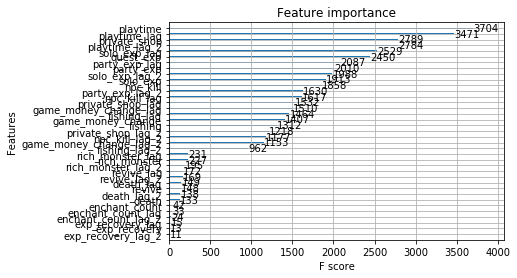

In [0]:
from matplotlib import pyplot
xgb.plot_importance(model)
pyplot.show()

In [0]:
from sklearn.metrics import accuracy_score
predictions_1 = model.predict(test1_data)
predictions_2 = model.predict(test2_data)

df_1 = pd.DataFrame(predictions_1)
df_2 = pd.DataFrame(predictions_2)

#df_1 = df_1.rename(columns = {'0':'survival_time'})
#df_2 = df_2.rename(columns = {'0':'survival_time'})

df_1.to_csv('/content/drive/My Drive/Colab Notebooks/bigcontest/190830_test1_result1_2.csv')
df_2.to_csv('/content/drive/My Drive/Colab Notebooks/bigcontest/190830_test2_result1_2.csv')

In [0]:

# https://stackoverflow.com/questions/44705896/how-to-reshape-my-input-to-feed-it-into-1d-convolutional-layer-for-sequence-clas